In [10]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [12]:
df=pd.read_csv(r'/home/alihan/Desktop/Leren & Beslissen/General/Data(LLE)/Data/Houses/Houses20-38/House29-1m.csv')
  
#We need to set the Month column as index and convert it into datetime
df.set_index('timestamp',inplace=True)
df.index=pd.to_datetime(df.index)
df = df.resample('5T').mean()
#df = df.loc['2019-03-31':'2019-10-28']
df = df.loc['2019-04-01':'2019-04-08']
df.drop(df.columns[[0,1,3,4,5]], axis = 1, inplace = True)
df = df.iloc[2:]

df

,IMPORT_KW
timestamp,
2019-04-01 00:10:00+02:00,0.588
2019-04-01 00:15:00+02:00,0.552
2019-04-01 00:20:00+02:00,0.504
2019-04-01 00:25:00+02:00,0.504
2019-04-01 00:30:00+02:00,0.504
...,...
2019-04-08 23:35:00+02:00,0.588
2019-04-08 23:40:00+02:00,0.576
2019-04-08 23:45:00+02:00,0.552


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2302 entries, 2019-04-01 00:10:00+02:00 to 2019-04-08 23:55:00+02:00
Freq: 5T
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IMPORT_KW  2302 non-null   float64
dtypes: float64(1)
memory usage: 36.0 KB


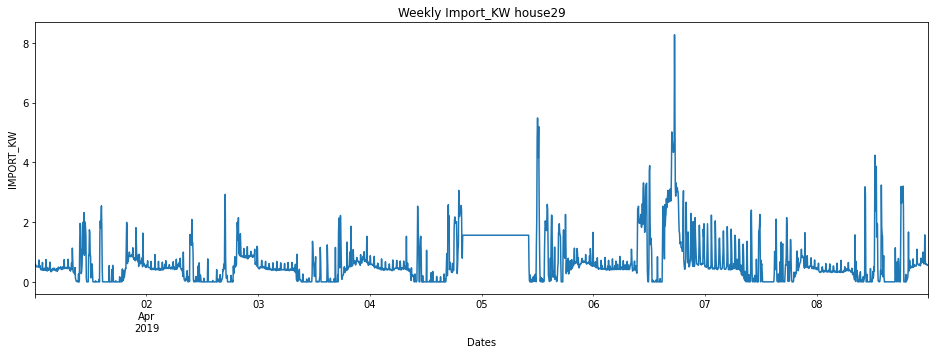

In [18]:
#df.index.freq = 'MS'
ax = df['IMPORT_KW'].plot(figsize = (16,5), title = "Weekly Import_KW house29")
ax.set(xlabel='Dates', ylabel='IMPORT_KW');

In [28]:
train_data = df[:len(df)-767]
test_data = df[len(df)-767:]

In [29]:
len(train_data), len(test_data)

(1535, 767)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [32]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [63]:
lstm_model.fit(generator,epochs=20)

Epoch 1/20
1523/1523 [==============================] - 6s 4ms/step - loss: 0.0032
Epoch 2/20
1523/1523 [==============================] - 7s 4ms/step - loss: 0.0031
Epoch 3/20
1523/1523 [==============================] - 9s 6ms/step - loss: 0.0031
Epoch 4/20
1523/1523 [==============================] - 11s 7ms/step - loss: 0.0032
Epoch 5/20
1523/1523 [==============================] - 12s 8ms/step - loss: 0.0031
Epoch 6/20
1523/1523 [==============================] - 9s 6ms/step - loss: 0.0031
Epoch 7/20
1523/1523 [==============================] - 8s 5ms/step - loss: 0.0031
Epoch 8/20
1523/1523 [==============================] - 8s 5ms/step - loss: 0.0031
Epoch 9/20
1523/1523 [==============================] - 8s 5ms/step - loss: 0.0030
Epoch 10/20
1523/1523 [==============================] - 8s 5ms/step - loss: 0.0031
Epoch 11/20
1523/1523 [==============================] - 8s 5ms/step - loss: 0.0033
Epoch 12/20
1523/1523 [==============================] - 8s 5ms/step - loss: 0.0030

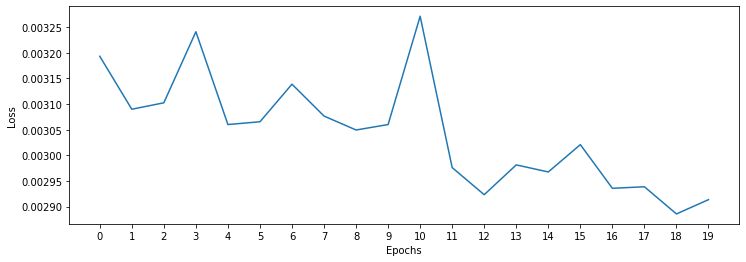

In [64]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [65]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [66]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[0.59430091],
       [0.62143659],
       [0.65754571],
       [0.65992228],
       [0.67383533],
       [0.7009487 ],
       [0.70570093],
       [0.70977375],
       [0.71715264],
       [0.72898834],
       [0.74743822],
       [0.75656276],
       [0.76516154],
       [0.77569514],
       [0.78776971],
       [0.79552957],
       [0.8041245 ],
       [0.81421773],
       [0.82121287],
       [0.82745065],
       [0.83337324],
       [0.83974528],
       [0.84719044],
       [0.85372968],
       [0.85977828],
       [0.8657226 ],
       [0.87177382],
       [0.87724909],
       [0.88255961],
       [0.88791467],
       [0.89281113],
       [0.8973607 ],
       [0.90162809],
       [0.90579464],
       [0.9100412 ],
       [0.91416665],
       [0.91814811],
       [0.92201108],
       [0.92579839],
       [0.92943451],
       [0.93294936],
       [0.93638577],
       [0.93969044],
       [0.94285587],
       [0.94588188],
       [0.94880085],
       [0.95165983],
       [0.954

In [67]:
test_data['LSTM_Predictions'] = lstm_predictions

test_data

<ipython-input-67-84411eb18cbe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['LSTM_Predictions'] = lstm_predictions


,IMPORT_KW,LSTM_Predictions
timestamp,,
2019-04-06 08:05:00+02:00,0.576,0.594301
2019-04-06 08:10:00+02:00,1.092,0.621437
2019-04-06 08:15:00+02:00,0.744,0.657546
2019-04-06 08:20:00+02:00,0.468,0.659922
2019-04-06 08:25:00+02:00,0.360,0.673835
...,...,...
2019-04-08 23:35:00+02:00,0.588,1.066129
2019-04-08 23:40:00+02:00,0.576,1.066129
2019-04-08 23:45:00+02:00,0.552,1.066129


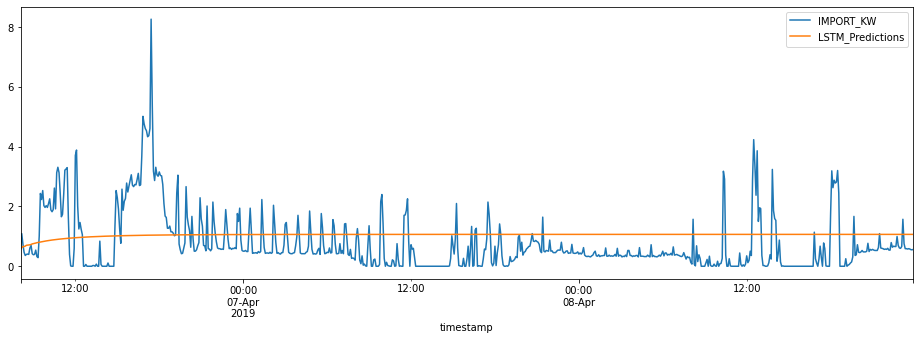

In [68]:
test_data['IMPORT_KW'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [69]:
from statsmodels.tools.eval_measures import rmse
lstm_rmse_error = rmse(test_data['IMPORT_KW'], 
test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['IMPORT_KW'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error:{lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 1.023406934184567
RMSE Error:1.011635771503048
Mean: 0.6705716767939567
